## The draining cup problem

In this notebook we will be modelling a draining cup. We assume the cup is shaped like a [conical frustrum](http://mathworld.wolfram.com/ConicalFrustum.html) or truncated cone:

![](../../assets/cup.png)

$D$ and $d$ are the top and bottom diameters of the cup, $H$ is the side length between the diameters, $d_h$ is the hole diameter. We also define $H'$ as the vertical height of the cup and $h$ as the vertical height (or level) of the liquid in the cup

### Volume-height relationship

Let's work out the relationship between the volume of water and the level in the cup by integrating the area:

$$V = \int_0^h A(h) dh$$

In [1]:
import sympy
sympy.init_printing()

In [2]:
D, d, H, h = sympy.symbols('D, d, H, h', real=True)

In [3]:
R = D/2
r = d/2
Hprime = sympy.sqrt(H**2 - (R - r)**2)  # Pythagoras

The radius changes linearly from the small one to the large one:

In [4]:
radius = r + h/Hprime*(R - r)

Now it is easy to calculate the area:

In [5]:
A = sympy.pi*radius**2

And from there, the volume:

In [6]:
V = sympy.integrate(A, (h, 0, h))

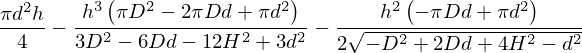

In [7]:
V

In [8]:
print(V)

pi*d**2*h/4 - h**3*(pi*D**2 - 2*pi*D*d + pi*d**2)/(3*D**2 - 6*D*d - 12*H**2 + 3*d**2) - h**2*(-pi*D*d + pi*d**2)/(2*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))


### Dynamic model

The basic model of the cup we will be working with looks something like this:

\begin{align}
\frac{dV}{dt} &= -F_{\text{out}} & \text{Mass Balance simplified to volume balance} \\
F_{\text{out}} &= f(h) & \text{Hydraulics} \\
h &= f(V) & \text{Geometry} \\
\end{align}

The above geometric description allows us to find the $V(h)$, but we actually want $h(V)$.

In [17]:
Vsymb = sympy.symbols('V', real=True)

In [20]:
hV = sympy.solve(Vsymb - V, h)

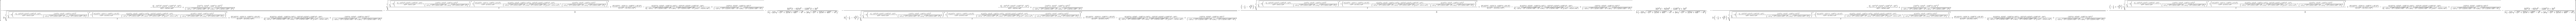

In [21]:
hV

In [19]:
#print(hV)

-(-3*(-3*D**2*d**2 + 6*D*d**3 + 12*H**2*d**2 - 3*d**4)/(4*D**2 - 8*D*d + 4*d**2) + (3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)**2/(-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))**2)/(3*(sqrt(-4*(-3*(-3*D**2*d**2 + 6*D*d**3 + 12*H**2*d**2 - 3*d**4)/(4*D**2 - 8*D*d + 4*d**2) + (3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)**2/(-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))**2)**3 + (27*(3*D**2*V - 6*D*V*d - 12*H**2*V + 3*V*d**2)/(pi*D**2 - 2*pi*D*d + pi*d**2) - 9*(3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)*(-3*D**2*d**2 + 6*D*d**3 + 12*H**2*d**2 - 3*d**4)/((-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))*(4*D**2 - 8*D*d + 4*d**2)) + 2*(3*D**2*d - 6*D*d**2 - 12*H**2*d + 3*d**3)**3/(-2*D*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2) + 2*d*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2))**3)**2)/2 + 27*(3*D**2*V - 6*D*V*d - 12*H**2*V + 3*V*d**2)/(2*(pi*D**2 - 2*pi*D*d + pi*d**2)) - 9*(3*D**2*d - 6*D*d**2 - 12*